## 1. Sex is included; we need to update in .py
## 2. How about changing CHILDREN_COUNT to NUM_CHILDREN?
## 3. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

HOUSEHOLD_ID = 'hhid'

HOUSEHOLD_SIZE = 'hhsize'
VEHICLE_COUNT = 'vehicle_count'
CHILDREN_COUNT = 'numchildren'
INCOME = 'hhincome_broad'
HOME_OWNERSHIP = 'home_ownership'
OFFSTREET_PARKING = 'offpark'
YEAR_RESIDENCE = 'year_residence'
WEIGHT = 'hh_wt_revised'

# personal attibutes
PERSON_ID = 'personid'
AGE = 'age'
RACE_WHITE = 'race_white'
RACE_BLACK = 'race_afam'
RACE_ASIAN = 'race_asian'
RACE_HISPANIC = 'race_hisp'
EDUCATION = 'education'
YEARS_AFTERHIGH = 'years_after_highschool'
EMPLOYED = 'employment'
STUDENT = 'student'
FEMALE = 'female'
GENDER = 'gender'

# hh-level personal attributes
MEAN_AGE = 'mean_age'
PROP_WHITE = 'proportion_white'
PROP_BLACK = 'proportion_black'
PROP_ASIAN = 'proportion_asian'
PROP_HISPANIC = 'proportion_hispanic'
YEAR_EDUCATION = 'mean_education_year'
PROP_EMPLOYED = 'proportion_employed'
PROP_STUDENT = 'proportion_student'
PERSON_COUNT = 'personid_count'
PROP_FEMALE = 'proportion_female'

# trip attributes
TRIP_ID = 'tripid'
DISTANCE = 'trip_path_distance'
ONE_DAY_IN_MINIUTES = 1440
DEPART_TIME = 'depart_time_mam'

## MODES and binary categories
MODES = 'mode_1'
DRIVING_ALONE = 'driving_alone'
DRIVING_WITH_OTHERS = 'driving_with_others'
TRANSIT = 'transit'
BIKING = 'biking'
WALKING = 'walking'

##
DURATION = 'google_duration'
NUMBER_TRAVELERS = 'travelers_total'

## PURPOSE for travel and binary categories
PURPOSE ='dest_purpose'
WENT_HOME = 'went_home'
WENT_WORK = 'went_work'
ERRANDS = 'errands'
SOCIAL = 'social'
GAVE_RIDE = 'gave_ride'

# hh-level summary features
MEAN_DISTANCE = 'mean_distance'
MEAN_DEPART_TIME = 'mean_depart_time'
MEAN_NUMBER_TRAVELERS = 'mean_num_travelers'
PROP_DRIVING_ALONE = 'prop_driving_alone'
PROP_DRIVING_WITH_OTHERS = 'prop_driving_with_others'
PROP_TRANSIT = 'prop_transit'
PROP_BIKING = 'prop_biking'
PROP_WALKING = 'prop_walking'
MEAN_DURATION = 'mean_duration'
PROP_WENT_HOME = 'prop_went_home'
PROP_WENT_WORK = 'prop_went_work'
PROP_ERRANDS = 'prop_errands'
PROP_SOCIAL = 'prop_social'
PROP_GAVE_RIDE = 'prop_gave_ride'
TRIP_COUNT = 'number_of_trips'


# finally, new variables that will be added to summarize data
# after clustering (not used in clustering)
NO_VEHICLE = 'no_vehicle'

DRIVING_DURATION = 'driving_duration'
TRANSIT_DURATION = 'transit_duration'
BIKING_DURATION = 'biking_duration'
WALKING_DURATION = 'walking_duration'

## hh level
MEAN_DRIVING_DURATION = 'mean_driving_duration'
MEAN_TRANSIT_DURATION = 'mean_transit_duration'
MEAN_BIKING_DURATION = 'mean_biking_duration'
MEAN_WALKING_DURATION = 'mean_walking_duration'

DRIVING_BROAD = 'driving_broad'
PROP_DRIVING_BROAD = 'prop_driving_broad'

CLUSTER = 'cluster'

In [2]:
household = pd.read_excel('psrc/household.xlsx', header = 1)
person = pd.read_excel('psrc/person.xlsx', header = 1)
trip = pd.read_excel('psrc/trip.xlsx', header = 1)
blockgroup_mapping = pd.read_csv('SeattleCensusBlockGroups.csv', index_col=0, dtype={'area': str})
blockgroup_mapping.head()

,geoid,area,geometry,lat,long
0,530330069001,2330454.00803,POLYGON ((-122.3622723975664 47.63959675028052...,47.637175,-122.364974
1,530330116003,5959702.67911,POLYGON ((-122.3873749118774 47.53032077312103...,47.525951,-122.385921
2,530330116005,3510129.29265,POLYGON ((-122.3915979135054 47.53061276788692...,47.523649,-122.391666
3,530330120003,5087951.1346,POLYGON ((-122.3794458516461 47.51655179140596...,47.514812,-122.385999
4,530330115002,5727877.25608,POLYGON ((-122.3752759110912 47.53009878854852...,47.525036,-122.376331


In [12]:
len(trip) / len(person)
print(trip.columns)
print(trip["trip_weight_revised"].sum() / household["hh_day_wt_revised"].sum() )


Index(['recid', 'hhid', 'personid', 'pernum', 'tripid', 'tripnum', 'tottrip1',
       'tottrip2', 'daynum', 'hhgroup',
       ...
       'o_rgcname', 'o_taz2010', 'd_tract', 'd_bg', 'd_puma10', 'd_rgcname',
       'd_taz2010', 'nwkdays', 'hh_day_wt_revised', 'trip_weight_revised'],
      dtype='object', length=113)
10.4748982851


In [6]:
person.columns

Index(['hhid', 'personid', 'pernum', 'sample_segment', 'hhgroup', 'traveldate',
       'relationship', 'proxy_parent', 'proxy', 'age',
       ...
       'wbt_bikemore_3', 'wbt_bikemore_4', 'wbt_bikemore_5', 'rmove_incentive',
       'call_center', 'mobile_device', 'num_trips', 'nwkdays', 'hh_wt_revised',
       'hh_day_wt_revised'],
      dtype='object', length=113)

In [56]:
# The study only focuses on those with households residing in Seattle, identified by blockgroups
household = household.loc[household['final_home_bg'].isin(blockgroup_mapping['geoid'])]
household.head()

,hhid,hhgroup,sample_segment,sample_county,final_cnty,cityofredmond,cityofseattle,psrc,final_home_tract,final_home_bg,...,day2complete,day3complete,day4complete,day5complete,day6complete,day7complete,num_trips,nwkdays,hh_wt_revised,hh_day_wt_revised
1,17100024,2,51,King,1,0,1,0,53033007600,530330076002,...,NaN,NaN,NaN,NaN,NaN,NaN,14,1,26.224981,26.224981
2,17100052,2,51,King,1,0,1,0,53033007500,530330075005,...,NaN,NaN,NaN,NaN,NaN,NaN,5,1,25.692826,25.692826
3,17100059,1,50,King,1,0,1,0,53033008400,530330084001,...,1.0,1.0,1.0,1.0,1.0,0.0,38,3,47.768728,15.922909
5,17100102,2,50,King,1,0,1,0,53033007500,530330075004,...,NaN,NaN,NaN,NaN,NaN,NaN,5,1,318.861344,318.861344
6,17100108,2,51,King,1,0,1,0,53033008002,530330080022,...,NaN,NaN,NaN,NaN,NaN,NaN,4,1,24.899462,24.899462


In [57]:
household[OFFSTREET_PARKING].unique()

array([ 1,  0, 10,  2,  3,  4,  6,  7,  9,  8,  5])

hhincome_broad
1    257
2    348
3    316
4    248
5    717
6    127
Name: hhid, dtype: int64

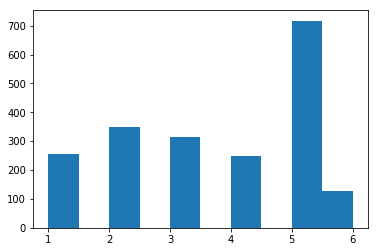

In [58]:
plt.hist(household[INCOME])
household.groupby(INCOME)[HOUSEHOLD_ID].nunique()

numchildren
0    1782
1     141
2      80
3       8
4       1
5       1
Name: hhid, dtype: int64

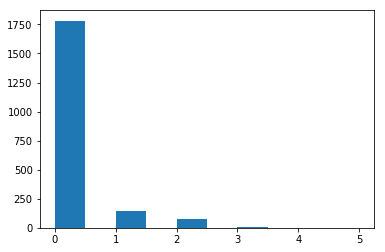

In [59]:
plt.hist(household[CHILDREN_COUNT])
household.groupby(CHILDREN_COUNT)[HOUSEHOLD_ID].nunique()

In [60]:
hh = household[[HOUSEHOLD_ID, CHILDREN_COUNT, WEIGHT]].copy()

"""
<Household-level features and categories>

a. INCOME:
    1: Under $25,000
    2: $25,000-$49,999
    3: $50,000-$74,999
    4: $75,000-$99,999
    5:$100,000 or more
    NaN: missing

b. HOUSEHOLD SIZE: in this data, there is no household with size 8 or greater 
    1: 1 person
    2: 2 people
    3: 3 people
    4: 4 people
    5: 5 people
    6: 6 people
    7: 7 people
    8: 8 people
    9: 9 people
   10: 10 people
   11: 11 people
   12: 12 or more people
    
c. VEHICLE_COUNT: in this data, there is no household with size 8 or greater 
    0: 0 (no vehicles)
    1: 1 vehicle
    2: 2 vehicles
    3: 3
    4: 4
    5: 5
    6: 6
    7: 7
    8: 8
    9: 9
   10: 10 or more vehicles
   
d. NO_VEHICLE:
    0: No vehicle (VEHICLE_COUNT == 0)
    1: Have at least one vehicle
     
e. CHILDREN_COUNT: unique values {0, 1, 2, 3, 4, 5}

f. HOME_OWNERSHIP:
    0: Not own
    1: Own/paying mortgage

g. OFFSTREET_PARKING: all values exist in this data
    0: 0 (no spaces available)
    1: 1
    2: 2
    3: 3
    4: 4
    5: 5
    6: 6
    7: 7
    8: 8
    9: 9
   10: 10 or more

h. YEAR_RESIDENCE:
    1 -> 1: Less than a year
    2 -> 2: Between 1 and 2 years
    3 -> 3: Between 2 and 3 years
    4 -> 5: Between 3 and 5 years
    5 -> 10: Between 5 and 10 years
    6, 7 -> 20: 10+ years

i. WEIGHT: survey weight
"""

hh[INCOME] = household[INCOME].replace(6, np.nan)
hh[HOUSEHOLD_SIZE] = household[HOUSEHOLD_SIZE]
hh[VEHICLE_COUNT] = household[VEHICLE_COUNT]
hh[NO_VEHICLE] = np.where(household[VEHICLE_COUNT] == 0, 1, 0)
hh[CHILDREN_COUNT] = household[CHILDREN_COUNT]
hh[HOME_OWNERSHIP] = household['rent_own'].replace([1, 2, 3, 4, 5], [1, 0, 0, 0, np.nan])
hh[OFFSTREET_PARKING] = household['offpark']
hh[YEAR_RESIDENCE] = household['res_dur'].replace([2, 3, 4, 5, 6, 7], [2, 3, 5, 10, 20, 20])
hh.head()

,hhid,numchildren,hh_wt_revised,hhincome_broad,hhsize,vehicle_count,no_vehicle,home_ownership,offpark,year_residence
1,17100024,1,26.224981,4.0,3,1,0,1.0,1,2
2,17100052,0,25.692826,1.0,1,0,1,0.0,1,20
3,17100059,0,47.768728,5.0,1,0,1,0.0,0,1
5,17100102,0,318.861344,4.0,1,1,0,0.0,1,5
6,17100108,0,24.899462,5.0,2,1,0,0.0,10,2


In [61]:
person.head()

,hhid,personid,pernum,sample_segment,hhgroup,traveldate,relationship,proxy_parent,proxy,age,...,wbt_bikemore_3,wbt_bikemore_4,wbt_bikemore_5,rmove_incentive,call_center,mobile_device,num_trips,nwkdays,hh_wt_revised,hh_day_wt_revised
0,17100005,1710000501,1,23,2,2017-05-24,0,NaN,1,9,...,5.0,5.0,5.0,NaN,0.0,0.0,5,1,24.441709,24.441709
1,17100005,1710000502,2,23,2,2017-05-24,1,NaN,3,10,...,NaN,NaN,NaN,NaN,0.0,0.0,3,1,24.441709,24.441709
2,17100024,1710002401,1,51,2,2017-04-12,0,NaN,1,6,...,2.0,4.0,4.0,NaN,0.0,0.0,8,1,26.224981,26.224981
3,17100024,1710002402,2,51,2,2017-04-12,1,NaN,2,6,...,5.0,5.0,5.0,NaN,0.0,0.0,4,1,26.224981,26.224981
4,17100024,1710002403,3,51,2,2017-04-12,2,NaN,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,26.224981,26.224981


(array([ 3020.,     0.,     0.,  3095.,     0.,     0.,    20.,     0.,
            0.,   119.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

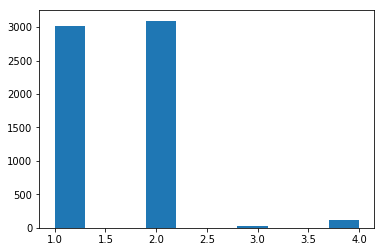

In [62]:
plt.hist(person['gender'])

In [63]:
ps = person[[HOUSEHOLD_ID, PERSON_ID]].copy()

"""
<Person-level features and categories>

a. AGE: Each category was mapped using the middle point of the age range
    1 -> 2.0 (0-4 years old)
    2 -> 8.0 (5-11 years old)
    3 -> 13.5 (12-15 years)
    4 -> 16.5 (16-17 years)
    5 -> 21.0 (18-24 years)
    6 -> 29.5 (25-34 years)
    7 -> 39.5 (35-44 years)
    8 -> 49.5 (45-54 years)
    9 -> 59.5 (55-64 years)
   10 -> 69.5 (65-74 years)
   11 -> 79.5 (75-84 years)
   12 -> 89.5 (85 or years older)

b. RACE_WHITE: only for 18+ olds
    0: Non-white
    1: White
    NaN: missing or N/A
    
c. RACE_BLACK: only for 18+ olds
    0: Non-black
    1: Black
    NaN: missing or N/A
    
d. RACE_ASIAN: only for 18+ olds
    0: Non-asian
    1: Asian
    NaN: missing or N/A
    
e. RACE_HISPANIC: only for 18+ olds
    0: Non-hispanic
    1: Hispanic
    NaN: missing or N/A
    
f. YEARS_AFTERHIGH: calculated from education categories using discretion
    1 -> 0.0 (Less than high school)
    2 -> 0.0 (High school graduate)
    3 -> 1.0 (Some college)
    4 -> 2.0 (Vocational/technical training)
    5 -> 2.0 (Associates degree)
    6 -> 4.0 (Bachelor degree)
    7 -> 6.0 (Graduate/post-graduate degree)
    NaN -> missing or N/A

g. EMPLOYED: 
    0: Unemplyed (homemaker, retired, or not employed) 
    1: employed (full time, part time, self-employed, volunteer/intern)

h. STUDENT:
    0: No
    1: Yes (full time or part time student)
    
i. FEMALE:
    1 -> 0: Male
    2 -> 1: Female
 3, 4 -> NaN: another/prefer not to answer
    
"""

ps[AGE] = person[AGE].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                              [2.0, 8.0, 13.5, 16.5, 21.0, 29.5, 39.5, 49.5, 59.5, 69.5, 79.5, 89.5])
ps[RACE_WHITE] = person[RACE_WHITE]
ps[RACE_BLACK] = person[RACE_BLACK]
ps[RACE_ASIAN] = person[RACE_ASIAN]
ps[RACE_HISPANIC] = person[RACE_HISPANIC]
ps[YEARS_AFTERHIGH] = person[EDUCATION].replace([1, 2, 3, 4, 5, 6, 7], 
                                                [0.0, 0.0, 1.0, 2.0, 2.0, 4.0, 6.0])
ps[EMPLOYED] = person[EMPLOYED].replace([1, 2, 3, 4, 5, 6, 7], [1, 1, 1, 1, 0, 0, 0])
ps[STUDENT] = person[STUDENT].replace([1, 2, 3], [0, 1, 1])
ps[FEMALE] = person[GENDER].replace([1, 2, 3, 4], [0, 1, np.nan, np.nan])

In [64]:
# Summarize personal level data to household level, by calculating means of each features

ps_household = ps.groupby([HOUSEHOLD_ID], as_index = False).agg(
    {AGE: 'mean', RACE_WHITE: 'mean', YEARS_AFTERHIGH: 'mean', 
     RACE_BLACK: 'mean', RACE_ASIAN: 'mean', RACE_HISPANIC: 'mean', 
     EMPLOYED: 'mean', STUDENT: 'mean', FEMALE: 'mean'})
ps_household.rename(columns={AGE: MEAN_AGE, RACE_WHITE: PROP_WHITE, RACE_BLACK: PROP_BLACK,
                             RACE_ASIAN: PROP_ASIAN, RACE_HISPANIC: PROP_HISPANIC, 
                             YEARS_AFTERHIGH: YEAR_EDUCATION, EMPLOYED: PROP_EMPLOYED,
                             STUDENT: PROP_STUDENT, PERSON_ID: PERSON_COUNT,
                             FEMALE: PROP_FEMALE}, inplace=True)
#ps_household.head()

# merge person level data with household level
hh_plus_ps = pd.merge(left=hh, right=ps_household, how='inner', 
                      left_on=HOUSEHOLD_ID, right_on = HOUSEHOLD_ID)
hh_plus_ps.head()

,hhid,numchildren,hh_wt_revised,hhincome_broad,hhsize,vehicle_count,no_vehicle,home_ownership,offpark,year_residence,mean_age,proportion_white,mean_education_year,proportion_black,proportion_asian,proportion_hispanic,proportion_employed,proportion_student,proportion_female
0,17100024,1,26.224981,4.0,3,1,0,1.0,1,2,20.333333,1.0,6.0,0.0,0.0,0.0,1.0,0.5,1.0
1,17100052,0,25.692826,1.0,1,0,1,0.0,1,20,69.500000,1.0,6.0,0.0,0.0,0.0,1.0,0.0,1.0
2,17100059,0,47.768728,5.0,1,0,1,0.0,0,1,29.500000,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
3,17100102,0,318.861344,4.0,1,1,0,0.0,1,5,39.500000,1.0,6.0,0.0,1.0,0.0,1.0,0.0,0.0
4,17100108,0,24.899462,5.0,2,1,0,0.0,10,2,29.500000,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.5


array([  6.,   1.,  nan,   4.,   2.,   0.])

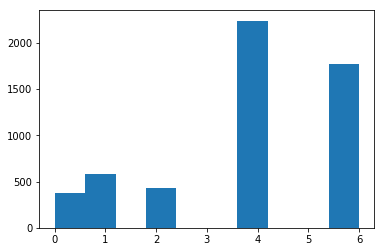

In [65]:
plt.hist(ps[YEARS_AFTERHIGH].dropna())
ps[YEARS_AFTERHIGH].unique()

In [66]:
trip = trip.replace(-9998, np.nan)   # replace -9998 with nan
tr = trip[[HOUSEHOLD_ID, PERSON_ID, TRIP_ID]].copy()

"""
<Trip-level features and categories>

a. DISTANCE: travel distance in miles estimated by Google

b. DEPART_TIME: Departure time in minutes, 0 - 1440 (1 day = 1440 minutes).
                If greater than 1440, divided by 1440 and used the remainder

c. NUMBER_TRAVELERS: integer values from 1 - 9 (or NaN)

d. MODES: five modes, dummy variable for each category was created after this
    - DRIVING_ALONE
    - DRIVING_WITH_OTHERS
    - TRANSIT
    - BIKING
    - WALKING

e. DURATION: travel duration in minutes(?) estimated by Google

f. duration per mode
    - DRIVING_DURATION 
    - TRANSIT_DURATION 
    - BIKING_DURATION 
    - WALKING_DURATION 

g. PURPOSE: purpose of each trip, dummy variables created 
(PURPOSE == 31 doesn't exist in codebook so changed to NaN)
     - WENT_HOME
     - WENT_WORK
     - ERRANDS
     - SOCIAL
     - GAVE_RIDE

"""


tr[DISTANCE] = pd.to_numeric(trip[DISTANCE], errors='coerce').fillna(0).astype(np.float)
tr[DEPART_TIME] = trip[DEPART_TIME].replace([-5, 1440], np.nan)
tr[DEPART_TIME] = tr[DEPART_TIME] % ONE_DAY_IN_MINIUTES
tr[NUMBER_TRAVELERS] = trip[NUMBER_TRAVELERS]

# COMMENT ON HOW THEY ARE MAPPED
tr[MODES] = trip[MODES].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17, 18, 21, 22, 
                                 23, 24, 26, 27, 28, 31, 32, 33, 34, 36, 37, 41, 42, 47, 52, 97], 
                                [WALKING, BIKING, DRIVING_ALONE, DRIVING_ALONE, DRIVING_ALONE, DRIVING_ALONE, DRIVING_ALONE, 
                                 DRIVING_ALONE, DRIVING_ALONE, DRIVING_ALONE, DRIVING_ALONE, DRIVING_ALONE, DRIVING_ALONE,
                                 DRIVING_ALONE, DRIVING_WITH_OTHERS, DRIVING_WITH_OTHERS, DRIVING_WITH_OTHERS,
                                 TRANSIT, np.nan, np.nan, np.nan, np.nan, np.nan, TRANSIT, DRIVING_WITH_OTHERS, 
                                 DRIVING_WITH_OTHERS, np.nan, np.nan, TRANSIT, TRANSIT, np.nan, TRANSIT, np.nan])
# modify values if number of travelers is 1; otherwise leave alone
tr[MODES] = np.where( (tr[MODES] == DRIVING_WITH_OTHERS) & (tr[NUMBER_TRAVELERS] == 1), DRIVING_ALONE, tr[MODES])  
# create dummy variables for modes
dummy_modes = pd.get_dummies(tr[MODES])
dummy_modes.loc[tr[MODES].isnull(), :] = np.nan
tr = pd.concat([tr, dummy_modes], axis = 1)



tr[DRIVING_BROAD] = np.where( (tr[MODES] == DRIVING_ALONE) | (tr[MODES] == DRIVING_WITH_OTHERS), 1, 0) 
tr[DRIVING_BROAD] = np.where( tr[MODES].isnull(), np.nan, tr[DRIVING_BROAD]) 

tr[DURATION] = pd.to_numeric(trip[DURATION], errors='coerce').fillna(0).astype(np.int64)
tr[DRIVING_DURATION] = np.where( (tr[MODES] == DRIVING_ALONE) | (tr[MODES] == DRIVING_WITH_OTHERS), tr[DURATION], np.nan)
tr[TRANSIT_DURATION] = np.where( tr[MODES] == TRANSIT , tr[DURATION], np.nan)
tr[BIKING_DURATION] = np.where( tr[MODES] == BIKING , tr[DURATION], np.nan)
tr[WALKING_DURATION] = np.where( tr[MODES] == WALKING , tr[DURATION], np.nan)


tr[PURPOSE] = trip[PURPOSE].replace([1, 6, 9, 10, 11, 14, 30, 32, 33, 34, 50, 51, 52, 53, 54, 56, 60, 61, 62, 97, 31],
                                    [WENT_HOME, WENT_WORK, GAVE_RIDE, WENT_WORK, WENT_WORK, WENT_WORK, ERRANDS, ERRANDS, 
                                     ERRANDS, ERRANDS, SOCIAL, ERRANDS, SOCIAL, SOCIAL, SOCIAL, SOCIAL, np.nan, 
                                     ERRANDS, SOCIAL, np.nan, np.nan])
dummy_purpose = pd.get_dummies(tr[PURPOSE])
dummy_purpose.loc[tr[PURPOSE].isnull(), :] = np.nan
tr = pd.concat([tr, dummy_purpose], axis = 1)
tr.head()

,hhid,personid,tripid,trip_path_distance,depart_time_mam,travelers_total,mode_1,biking,driving_alone,driving_with_others,...,transit_duration,biking_duration,walking_duration,dest_purpose,3.0,errands,gave_ride,social,went_home,went_work
0,17100005,1710000501,1710000501001,2.299694,415.0,2.0,driving_alone,0.0,1.0,0.0,...,NaN,NaN,NaN,errands,0.0,1.0,0.0,0.0,0.0,0.0
1,17100005,1710000501,1710000501002,1.122817,430.0,2.0,driving_alone,0.0,1.0,0.0,...,NaN,NaN,NaN,errands,0.0,1.0,0.0,0.0,0.0,0.0
2,17100005,1710000501,1710000501003,3.263440,470.0,2.0,driving_alone,0.0,1.0,0.0,...,NaN,NaN,NaN,went_home,0.0,0.0,0.0,0.0,1.0,0.0
3,17100005,1710000501,1710000501004,8.126290,515.0,1.0,driving_alone,0.0,1.0,0.0,...,NaN,NaN,NaN,social,0.0,0.0,0.0,1.0,0.0,0.0
4,17100005,1710000501,1710000501005,8.044890,730.0,1.0,driving_alone,0.0,1.0,0.0,...,NaN,NaN,NaN,went_home,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
trip[NUMBER_TRAVELERS].unique()

array([  2.,   1.,   3.,   6.,   4.,   5.,  nan,   7.,   8.,   9.])

In [68]:
# Summarize trip level data into household level, using mean

tr_household = tr.groupby([HOUSEHOLD_ID], as_index = False).agg(
    {DISTANCE: 'mean', DEPART_TIME: 'mean', NUMBER_TRAVELERS: 'mean', DRIVING_ALONE: 'mean', DRIVING_WITH_OTHERS: 'mean',
     TRANSIT: 'mean', BIKING: 'mean', WALKING: 'mean', DURATION: 'mean', DRIVING_DURATION: 'mean', 
     TRANSIT_DURATION: 'mean', BIKING_DURATION: 'mean', WALKING_DURATION: 'mean',
     WENT_HOME: 'mean', WENT_WORK: 'mean', ERRANDS: 'mean',
     SOCIAL: 'mean', GAVE_RIDE: 'mean', TRIP_ID: 'count', DRIVING_BROAD: 'mean'
    })


tr_household.rename(columns = {DISTANCE: MEAN_DISTANCE, DEPART_TIME: MEAN_DEPART_TIME, NUMBER_TRAVELERS: MEAN_NUMBER_TRAVELERS, 
                              DRIVING_ALONE: PROP_DRIVING_ALONE, DRIVING_WITH_OTHERS: PROP_DRIVING_WITH_OTHERS,
                              TRANSIT: PROP_TRANSIT, BIKING: PROP_BIKING, WALKING: PROP_WALKING,
                              DURATION: MEAN_DURATION, DRIVING_DURATION: MEAN_DRIVING_DURATION, 
                              TRANSIT_DURATION: MEAN_TRANSIT_DURATION, BIKING_DURATION: MEAN_BIKING_DURATION,
                              WALKING_DURATION: MEAN_WALKING_DURATION, WENT_HOME: PROP_WENT_HOME, 
                              WENT_WORK: PROP_WENT_WORK, ERRANDS: PROP_ERRANDS,
                              SOCIAL: PROP_SOCIAL, GAVE_RIDE: PROP_GAVE_RIDE, TRIP_ID: TRIP_COUNT,
                              DRIVING_BROAD: PROP_DRIVING_BROAD}, inplace=True)

tr_household.head()

,hhid,mean_distance,mean_depart_time,mean_num_travelers,prop_driving_alone,prop_driving_with_others,prop_transit,prop_biking,prop_walking,mean_duration,...,mean_transit_duration,mean_biking_duration,mean_walking_duration,prop_went_home,prop_went_work,prop_errands,prop_social,prop_gave_ride,number_of_trips,prop_driving_broad
0,17100005,3.692886,484.375000,1.750000,1.000000,0.0,0.000000,0.000000,0.000000,8.750000,...,NaN,NaN,NaN,0.37500,0.000000,0.500000,0.125000,0.000000,8,1.000000
1,17100024,1.151667,621.071429,1.285714,0.357143,0.0,0.071429,0.214286,0.357143,5.071429,...,7.000000,5.0,2.800000,0.50000,0.285714,0.142857,0.000000,0.071429,14,0.357143
2,17100052,0.847550,735.000000,1.000000,0.000000,0.0,0.600000,0.000000,0.400000,5.400000,...,6.666667,NaN,3.500000,0.20000,0.000000,0.600000,0.200000,0.000000,5,0.000000
3,17100059,3.713700,947.631579,2.236842,0.045455,0.0,0.181818,0.000000,0.772727,18.921053,...,36.250000,NaN,7.176471,0.30303,0.272727,0.090909,0.333333,0.000000,38,0.045455
4,17100060,2.195801,409.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,6.200000,...,NaN,NaN,NaN,0.20000,0.000000,0.800000,0.000000,0.000000,5,1.000000


In [69]:
hh_plus_ps_plus_tr = pd.merge(left=hh_plus_ps, right=tr_household, how='inner', 
                      left_on=HOUSEHOLD_ID, right_on = HOUSEHOLD_ID)

hh_plus_ps_plus_tr.head()

result = hh_plus_ps_plus_tr
result.head()

,hhid,numchildren,hh_wt_revised,hhincome_broad,hhsize,vehicle_count,no_vehicle,home_ownership,offpark,year_residence,...,mean_transit_duration,mean_biking_duration,mean_walking_duration,prop_went_home,prop_went_work,prop_errands,prop_social,prop_gave_ride,number_of_trips,prop_driving_broad
0,17100024,1,26.224981,4.0,3,1,0,1.0,1,2,...,7.000000,5.0,2.800000,0.50000,0.285714,0.142857,0.000000,0.071429,14,0.357143
1,17100052,0,25.692826,1.0,1,0,1,0.0,1,20,...,6.666667,NaN,3.500000,0.20000,0.000000,0.600000,0.200000,0.000000,5,0.000000
2,17100059,0,47.768728,5.0,1,0,1,0.0,0,1,...,36.250000,NaN,7.176471,0.30303,0.272727,0.090909,0.333333,0.000000,38,0.045455
3,17100102,0,318.861344,4.0,1,1,0,0.0,1,5,...,NaN,NaN,NaN,0.20000,0.200000,0.200000,0.000000,0.400000,5,1.000000
4,17100108,0,24.899462,5.0,2,1,0,0.0,10,2,...,NaN,NaN,6.500000,0.50000,0.500000,0.000000,0.000000,0.000000,4,0.000000


In [70]:
# save result
result.to_csv('personas_processed_psrcdat.csv', index_label=False)

## When averaging modes into mode index, we use the weights to adjust per each blockgroups

## income info can be applied to this